In [24]:
#!pip3 install plotnine

In [ ]:
"""
The notebooks contains code for testing different tests based sample data
 0. Basics - Central limit theorem
 1. t-test
 2. Proportion test
 3. Anova 
 4. Chi-Square (Both Goodness of fit and Independence )
"""

In [ ]:
"""
Basics Statistics:
1. Data types:
    1. Categorical - Ordinal (Order Matters) and Nominal (Order doesn't matter)
    2. Numerical - Continuous and Discrete

2. Hypothesis testing terminologies:
    1. p-value - likelihood of pattern under null hypothesis

"""

In [ ]:
# student t-test
# 1. one sample t - test => comparing the value with the population parameter
# 2. two sample t - test => comparing if there is differnece between the samples

In [25]:
import pandas as pd
import numpy as np

from scipy import stats

import plotnine as p9

In [3]:
samplesDf = pd.DataFrame({
    'Sample_A' : np.random.randint(0,100,size = 1000),
    'Sample_B' : np.random.randint(0,100,size = 1000)
})
print('Sample df shape' + str(samplesDf.shape))
samplesDf.head()

Sample df shape(1000, 2)


,Sample_A,Sample_B
0,61,38
1,32,7
2,59,33
3,39,18
4,77,79


In [31]:
# Transform the dataframe from wide to long format
df_long = samplesDf.reset_index().melt(id_vars=['index'], value_vars=['Sample_A', 'Sample_B'],
                                var_name='Sample', value_name='Value')

# Adjusting the output to add an observed_no column for each sample
df_long['observed_no'] = df_long.groupby('Sample').cumcount() + 1
df_long = df_long[['observed_no', 'Sample', 'Value']]
samplesDf = df_long 
# Display the transformed dataframe
print(df_long.head())

   observed_no    Sample  Value
0            1  Sample_A     61
1            2  Sample_A     32
2            3  Sample_A     59
3            4  Sample_A     39
4            5  Sample_A     77


In [6]:
#Generic testing parameters
ALPHA = 0.05




In [ ]:
#one-sample t-test Theory

In [36]:
#one-sample t-test
Sample_A = samplesDf.loc[samplesDf.Sample == 'Sample_A','Value']
t_result = stats.ttest_1samp(Sample_A,70)
if t_result[1] < ALPHA:
    print('Sample mean != Population Mean')
else: 
    print('Not enough evidence to reject the null hypothesis')
    print(t_result)


Sample mean != Population Mean


In [ ]:
#two-sample t-test independent -Theory

Not enough evidence to reject the null hypothesis
Ttest_indResult(statistic=-0.5528762275630705, pvalue=0.580410016109019)


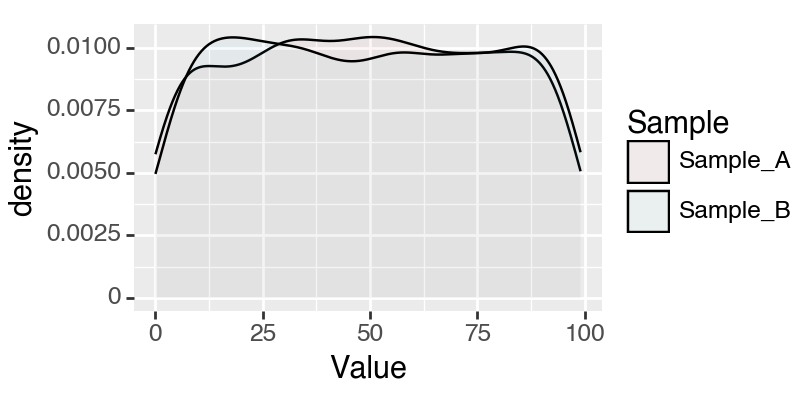

In [43]:
#two-sample t-test independent
Sample_A = samplesDf.loc[samplesDf.Sample == 'Sample_A','Value']
Sample_B = samplesDf.loc[samplesDf.Sample == 'Sample_B','Value']
t_result = stats.ttest_ind(Sample_A,Sample_B)
if t_result[1] < ALPHA:
    print('Sample mean != Population Mean')
else:
    print('Not enough evidence to reject the null hypothesis')
    print(t_result)

print(p9.ggplot(samplesDf) 
      + p9.aes(x='Value',fill='Sample')
       + p9.geom_density(alpha = ALPHA) 
       + p9.theme(figure_size=(4,2))
       )

In [ ]:
# Tests for Categorical value - (Head/Tail, Success/Failure)
# 1. ChiSquare Test - Goodness of fitness 
# 2. Fisher Extract - Checking if both the samples are from same population/distribution

In [51]:
# 1. ChiSquare Test
# Usecases: Checking if the coin is fair/not, Checking if the observed male/female ratio

#Generating Coin flip data
df = pd.DataFrame({
    'FlipNo': list(np.arange(1000)),
    'Result': ['Head' if np.random.rand(1) > 0.5 else 'Tail' for i in np.arange(1000)]
})
df.head()

chi = stats.chisquare(df['Result'].value_counts())
print('The results from ChiSquare: \n' + str(chi))
if chi[1] < ALPHA:
    print(' The sample data is from different distribution')
else:
    print("No Statiscally provable difference")

The results from ChiSquare: 
Power_divergenceResult(statistic=1.156, pvalue=0.28229665258331127)
We don't have enough data to prove the distribution


In [54]:
# 2. Fisher Extact Test
# To check if both samples are from same distribution or not
#Generating Coin flip data
df = pd.DataFrame({
    'FlipNo': list(np.arange(1000)),
    'Coin1': ['Head' if np.random.rand(1) > 0.5 else 'Tail' for i in np.arange(1000)],
    'Coin2': ['Head' if np.random.rand(1) > 0.5 else 'Tail' for i in np.arange(1000)]
})
df.head()

fisher = stats.fisher_exact(pd.crosstab(df['Coin1'],df['Coin2']))
print(fisher)

if fisher[1] < ALPHA:
    print('There is statistical evidence to prove different distribution/source')
else:
    print('There is no statistical evidence to prove the distribution')

SignificanceResult(statistic=0.9487676111336728, pvalue=0.7041718697571682)
There is no statistical evidence to prove the distribution
